# Foundations of Data Analysis 1 - Week 4 - Austin City Limits

<img src="images/week14.jpg">

Known as the “Live Music Capital of the World,” Austin, Texas is also home to the longest-running music series in American television history, Austin City Limits.  This dataset includes data on a sample of musicians that performed live on the PBS television series Austin City Limits over the last 10 years.  Data on each artist include measures of commercial popularity, such as the number of social media followers on Twitter or Facebook, and their success in winning a Grammy Music Award. 

**For artists age 30 or older, do female artists play different kinds of music on Austin City Limits than male artists?**

In [1]:
acl <- read.csv("data/AustinCityLimits.csv")
head(acl)

,Artist,Year,Month,Season,Gender,Age,Age.Group,Grammy,Genre,BB.wk.top10,Twitter,Twitter.100k,Facebook,Facebook.100k
,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
1,Aimee Mann,2008,November,fall,F,52,Fifties or Older,Y,Singer-Songwriter,0,101870,1,113576,1
2,Alabama Shakes,2013,February,winter,F,24,Twenties,N,Rock/Folk/Indie,1,73313,0,298278,1
3,Allen Toussaint,2009,January,winter,M,75,Fifties or Older,N,Jazz/Blues,NA,308634,1,10721,0
4,Andrew Bird,2009,October,fall,M,39,Thirties,N,Rock/Folk/Indie,1,56343,0,318313,1
5,Arcade Fire,2007,November,fall,F,33,Thirties,Y,Rock/Folk/Indie,1,404439,1,1711685,1
6,Asleep at the Wheel,2009,November,fall,M,62,Fifties or Older,Y,Country,0,3326,0,27321,0


How many artists are in this dataset?

In [2]:
str(acl)

'data.frame':	116 obs. of  14 variables:
 $ Artist       : Factor w/ 116 levels "Aimee Mann","Alabama Shakes",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Year         : int  2008 2013 2009 2009 2007 2009 2010 2009 2003 2008 ...
 $ Month        : Factor w/ 6 levels "December","February",..: 4 2 3 5 4 4 3 4 3 5 ...
 $ Season       : Factor w/ 2 levels "fall","winter": 1 2 2 1 1 1 2 1 2 1 ...
 $ Gender       : Factor w/ 2 levels "F","M": 1 1 2 2 1 2 2 2 2 1 ...
 $ Age          : int  52 24 75 39 33 62 37 35 43 67 ...
 $ Age.Group    : Factor w/ 4 levels "Fifties or Older",..: 1 4 1 3 3 1 3 3 2 1 ...
 $ Grammy       : Factor w/ 2 levels "N","Y": 2 1 1 1 2 2 1 1 2 1 ...
 $ Genre        : Factor w/ 4 levels "Country","Jazz/Blues",..: 4 3 2 3 3 1 3 3 3 2 ...
 $ BB.wk.top10  : int  0 1 NA 1 1 0 1 NA 1 0 ...
 $ Twitter      : int  101870 73313 308634 56343 404439 3326 125758 8197 158647 690 ...
 $ Twitter.100k : int  1 0 1 0 1 0 1 0 1 0 ...
 $ Facebook     : int  113576 298278 10721 318313 1711685 27321 56

How many of the first 10 artists in the dataset were Grammy winners?

In [3]:
first10art<-acl[1:10,]
first10gram <-first10art[first10art$Grammy == "Y",]
first10gram

,Artist,Year,Month,Season,Gender,Age,Age.Group,Grammy,Genre,BB.wk.top10,Twitter,Twitter.100k,Facebook,Facebook.100k
,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
1,Aimee Mann,2008,November,fall,F,52,Fifties or Older,Y,Singer-Songwriter,0,101870,1,113576,1
5,Arcade Fire,2007,November,fall,F,33,Thirties,Y,Rock/Folk/Indie,1,404439,1,1711685,1
6,Asleep at the Wheel,2009,November,fall,M,62,Fifties or Older,Y,Country,0,3326,0,27321,0
9,Beck,2003,January,winter,M,43,Forties,Y,Rock/Folk/Indie,1,158647,1,1381051,1


What genre was played by the first female artist in the dataset who was over 60 years of age?

In [4]:
aclfemale <-acl[acl$Gender == "F",]
head(aclfemale)

,Artist,Year,Month,Season,Gender,Age,Age.Group,Grammy,Genre,BB.wk.top10,Twitter,Twitter.100k,Facebook,Facebook.100k
,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
1,Aimee Mann,2008,November,fall,F,52,Fifties or Older,Y,Singer-Songwriter,0,101870,1,113576,1
2,Alabama Shakes,2013,February,winter,F,24,Twenties,N,Rock/Folk/Indie,1,73313,0,298278,1
5,Arcade Fire,2007,November,fall,F,33,Thirties,Y,Rock/Folk/Indie,1,404439,1,1711685,1
10,Bettye Lavette,2008,October,fall,F,67,Fifties or Older,N,Jazz/Blues,0,690,0,1715,0
11,Bjork,2007,October,fall,F,47,Forties,N,Singer-Songwriter,1,450096,1,2754505,1
17,Bonnie Rait,2012,November,fall,F,63,Fifties or Older,Y,Country,1,18683,0,357770,1


Create a subset of the data for artists age 30 or older.

In [5]:
older <-acl[acl$Age>=30,]

Create a table to show the marginal distribution for each variable. 

In [6]:
genre <- table(older$Genre)
genre


          Country        Jazz/Blues   Rock/Folk/Indie Singer-Songwriter 
               17                11                61                13 

In [7]:
gender <- table(older$Gender)
gender


 F  M 
25 77 

Create a contingency table to show the conditional distribution for gender and genre.

In [8]:
twoway <- table(older$Gender,older$Genre)
twoway

   
    Country Jazz/Blues Rock/Folk/Indie Singer-Songwriter
  F       6          4               8                 7
  M      11          7              53                 6

Make a bar chart to better visualize how many male and female artists played in each genre.

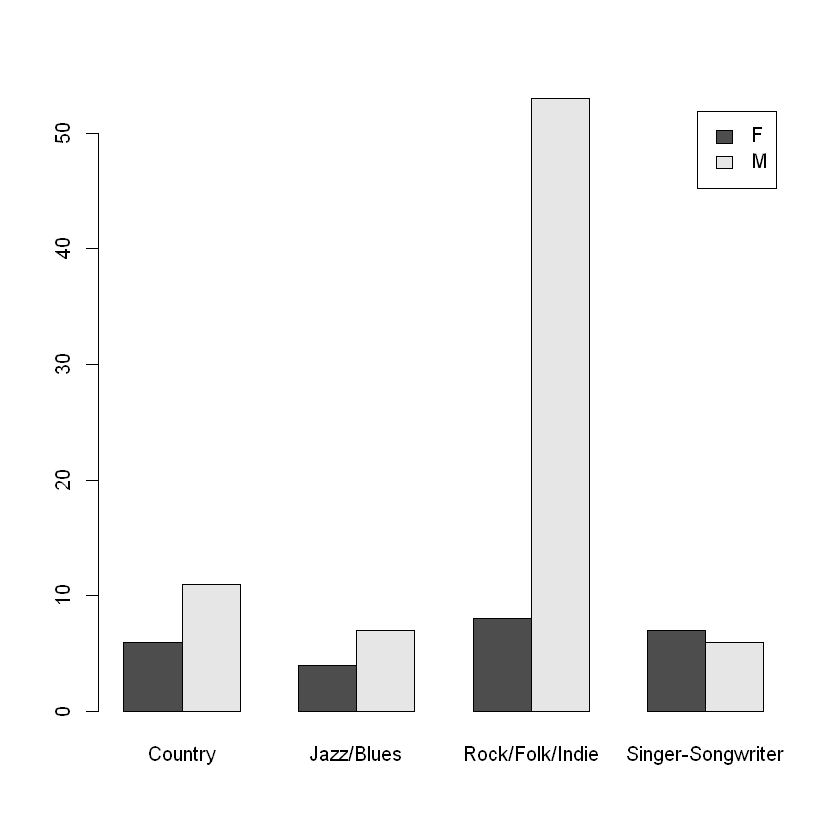

In [9]:
barplot(twoway, legend=T, beside=T)

Calculate P(A):  the probability of each type of music (genre) being played.

In [10]:
prop.table(genre)


          Country        Jazz/Blues   Rock/Folk/Indie Singer-Songwriter 
        0.1666667         0.1078431         0.5980392         0.1274510 

Calculate P(A|B): the probability of each genre being played, given the artist’s gender

In [11]:
#The number 1 references the first variable (gender) listed in the contingency table code.
#Proportion row 100%
prop.table(twoway,1)

   
       Country Jazz/Blues Rock/Folk/Indie Singer-Songwriter
  F 0.24000000 0.16000000      0.32000000        0.28000000
  M 0.14285714 0.09090909      0.68831169        0.07792208

In [12]:
#The number 2 reference hte second variable (genre) listed in the contingency table code.
#Proportion column 100%
prop.table(twoway,2)

   
      Country Jazz/Blues Rock/Folk/Indie Singer-Songwriter
  F 0.3529412  0.3636364       0.1311475         0.5384615
  M 0.6470588  0.6363636       0.8688525         0.4615385

How many male artists are in the 30+ year old artist subset of the Austin City Limits dataset?

In [13]:
aclmale <-acl[older$Gender == "M",]
str(aclmale)

'data.frame':	87 obs. of  14 variables:
 $ Artist       : Factor w/ 116 levels "Aimee Mann","Alabama Shakes",..: 2 3 5 6 7 8 11 12 13 14 ...
 $ Year         : int  2013 2009 2007 2009 2010 2009 2007 2012 2007 2006 ...
 $ Month        : Factor w/ 6 levels "December","February",..: 2 3 4 4 3 4 5 3 1 3 ...
 $ Season       : Factor w/ 2 levels "fall","winter": 2 2 1 1 2 1 1 2 2 2 ...
 $ Gender       : Factor w/ 2 levels "F","M": 1 2 1 2 2 2 1 2 2 2 ...
 $ Age          : int  24 75 33 62 37 35 47 49 31 46 ...
 $ Age.Group    : Factor w/ 4 levels "Fifties or Older",..: 4 1 3 1 3 3 2 2 3 2 ...
 $ Grammy       : Factor w/ 2 levels "N","Y": 1 1 2 2 1 1 1 1 1 2 ...
 $ Genre        : Factor w/ 4 levels "Country","Jazz/Blues",..: 3 2 3 1 3 3 4 2 3 3 ...
 $ BB.wk.top10  : int  1 NA 1 0 1 NA 1 0 0 1 ...
 $ Twitter      : int  73313 308634 404439 3326 125758 8197 450096 88689 114703 23244 ...
 $ Twitter.100k : int  0 1 1 0 1 0 1 0 1 0 ...
 $ Facebook     : int  298278 10721 1711685 27321 563505 18955

How many female artists are in the 30+ year old artist subset of the Austin City Limits dataset?

In [14]:
str(aclfemale)

'data.frame':	35 obs. of  14 variables:
 $ Artist       : Factor w/ 116 levels "Aimee Mann","Alabama Shakes",..: 1 2 5 10 11 17 19 22 23 32 ...
 $ Year         : int  2008 2013 2007 2008 2007 2012 2010 2008 2006 2007 ...
 $ Month        : Factor w/ 6 levels "December","February",..: 4 2 4 5 5 4 4 5 1 3 ...
 $ Season       : Factor w/ 2 levels "fall","winter": 1 2 1 1 1 1 1 1 2 2 ...
 $ Gender       : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Age          : int  52 24 33 67 47 63 32 35 41 56 ...
 $ Age.Group    : Factor w/ 4 levels "Fifties or Older",..: 1 4 3 1 2 1 3 3 2 1 ...
 $ Grammy       : Factor w/ 2 levels "N","Y": 2 1 2 1 1 2 1 1 1 2 ...
 $ Genre        : Factor w/ 4 levels "Country","Jazz/Blues",..: 4 3 3 2 4 1 3 4 4 1 ...
 $ BB.wk.top10  : int  0 1 1 0 1 1 1 NA 1 1 ...
 $ Twitter      : int  101870 73313 404439 690 450096 18683 20549 1510 46659 624380 ...
 $ Twitter.100k : int  1 0 1 0 1 0 0 0 0 1 ...
 $ Facebook     : int  113576 298278 1711685 1715 2754505 3577

The music played on Austin City Limits was grouped into four genres, including Country, Jazz, Rock and Singer-Songwriter. We wanted to examine only those artists who were age 30 or older. **Rock** was the most frequently played genre, performed by 
**59.8**% of the Austin City Limits artists. Among female artists, however, only **32.0**% of the artists played Rock music. This difference between the marginal and **conditional** probabilities suggests that gender and genre **are not** independent. This difference was also evident in the bar plots, where it was evident that females were more likely to perform in the 
**Singer-Songwriter** category than their male counterparts.

**Among male artists, is there an association between winning a Grammy and the genre of music that he plays?**

Create a table to show the marginal distributions for Genre and Grammy.

In [15]:
gendertot <- table(acl$Gender)
gendertot


 F  M 
35 81 

In [16]:
grammytot <- table(acl$Grammy)
grammytot


 N  Y 
67 49 

Create a contingency table to show the conditional distribution for Genre and Grammy.

In [17]:
twogram <- table(acl$Gender,acl$Grammy)
twogram

   
     N  Y
  F 21 14
  M 46 35

Make a bar chart to better visualize how many artists in each Genre received a Grammy.

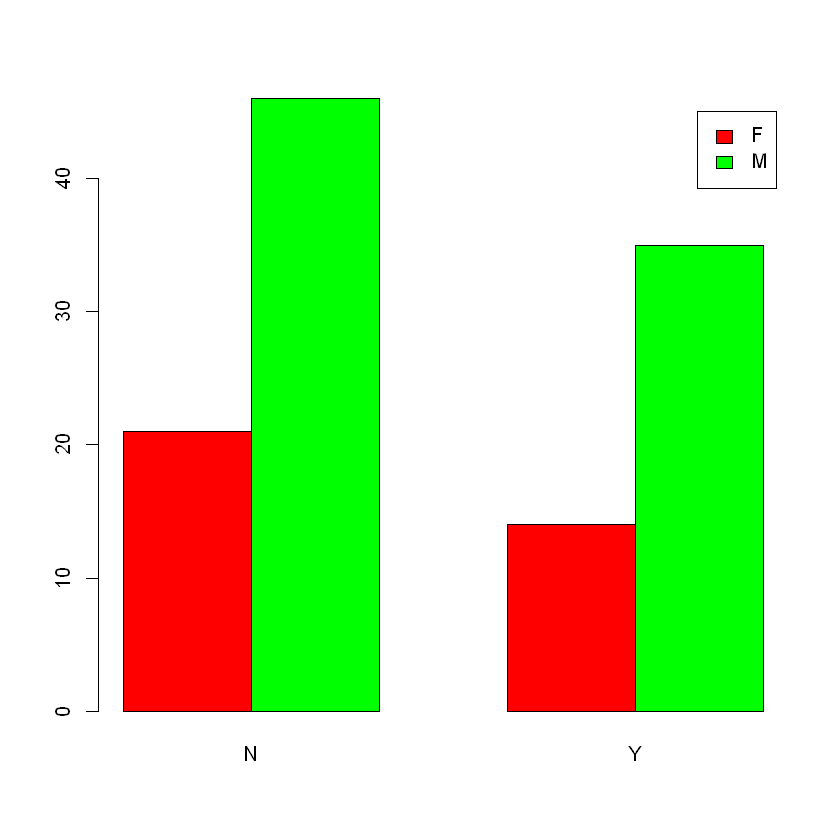

In [18]:
barplot(twogram, legend=T, beside=T, col = c("red", "green"))

In [19]:
twosong <- table(acl$Grammy,acl$Genre)
twosong

   
    Country Jazz/Blues Rock/Folk/Indie Singer-Songwriter
  N       6          7              42                12
  Y      12          6              26                 5

In [20]:
prop.table(twosong,1)

   
       Country Jazz/Blues Rock/Folk/Indie Singer-Songwriter
  N 0.08955224 0.10447761      0.62686567        0.17910448
  Y 0.24489796 0.12244898      0.53061224        0.10204082

In [21]:
prop.table(twosong,2)

   
      Country Jazz/Blues Rock/Folk/Indie Singer-Songwriter
  N 0.3333333  0.5384615       0.6176471         0.7058824
  Y 0.6666667  0.4615385       0.3823529         0.2941176

**Work only with male now:**

In [22]:
grammymale <- table(aclmale$Grammy)
grammymale


 N  Y 
48 39 

In [23]:
maletwosong <- table(aclmale$Grammy,aclmale$Genre)
maletwosong

   
    Country Jazz/Blues Rock/Folk/Indie Singer-Songwriter
  N       4          6              30                 8
  Y       9          4              22                 4

In [24]:
prop.table(maletwosong,1)

   
       Country Jazz/Blues Rock/Folk/Indie Singer-Songwriter
  N 0.08333333 0.12500000      0.62500000        0.16666667
  Y 0.23076923 0.10256410      0.56410256        0.10256410

In [25]:
prop.table(maletwosong,2)

   
      Country Jazz/Blues Rock/Folk/Indie Singer-Songwriter
  N 0.3076923  0.6000000       0.5769231         0.6666667
  Y 0.6923077  0.4000000       0.4230769         0.3333333

There **is** an association between winning a Grammy and the Genre of music an artist plays. The probability of winning a Grammy, regardless of Genre, is **43.21**%. However, examination of a **contingency** table containing both Grammy and Genre showed that **the conditional** probability of winning a Grammy changes by genre. If an artist is in the Country Genre, the conditional probability of winning a Grammy is **63.64** %, while if an artist is in the **Singer-Songwriter** Genre, the conditional probability of winning a Grammy is 28.6%. Visual examination of the barplot shows the conditional probabilities of winning a Grammy **are not equal** across Genres.

**You want to see if an artist's popularity on Facebook (whether or not they have 100,000 or more likes) has anything to do with their age.**

How many artists in the dataset have 100,000 or more likes on Facebook?

In [26]:
famous <-acl[acl$Facebook > 100000,]
str(famous)

'data.frame':	85 obs. of  14 variables:
 $ Artist       : Factor w/ 116 levels "Aimee Mann","Alabama Shakes",..: 1 2 4 5 7 9 11 13 14 16 ...
 $ Year         : int  2008 2013 2009 2007 2010 2003 2007 2007 2006 2012 ...
 $ Month        : Factor w/ 6 levels "December","February",..: 4 2 5 4 3 3 5 1 3 5 ...
 $ Season       : Factor w/ 2 levels "fall","winter": 1 2 1 1 2 2 1 2 2 1 ...
 $ Gender       : Factor w/ 2 levels "F","M": 1 1 2 1 2 2 1 2 2 2 ...
 $ Age          : int  52 24 39 33 37 43 47 31 46 32 ...
 $ Age.Group    : Factor w/ 4 levels "Fifties or Older",..: 1 4 3 3 3 2 2 3 2 3 ...
 $ Grammy       : Factor w/ 2 levels "N","Y": 2 1 1 2 1 2 1 1 2 2 ...
 $ Genre        : Factor w/ 4 levels "Country","Jazz/Blues",..: 4 3 3 3 3 3 4 3 3 3 ...
 $ BB.wk.top10  : int  0 1 1 1 1 1 1 0 1 1 ...
 $ Twitter      : int  101870 73313 56343 404439 125758 158647 450096 114703 23244 367417 ...
 $ Twitter.100k : int  1 0 0 1 1 1 1 1 0 1 ...
 $ Facebook     : int  113576 298278 318313 1711685 563505 1

Which age group has the highest number of artists that have 100,000 or more likes on Facebook?

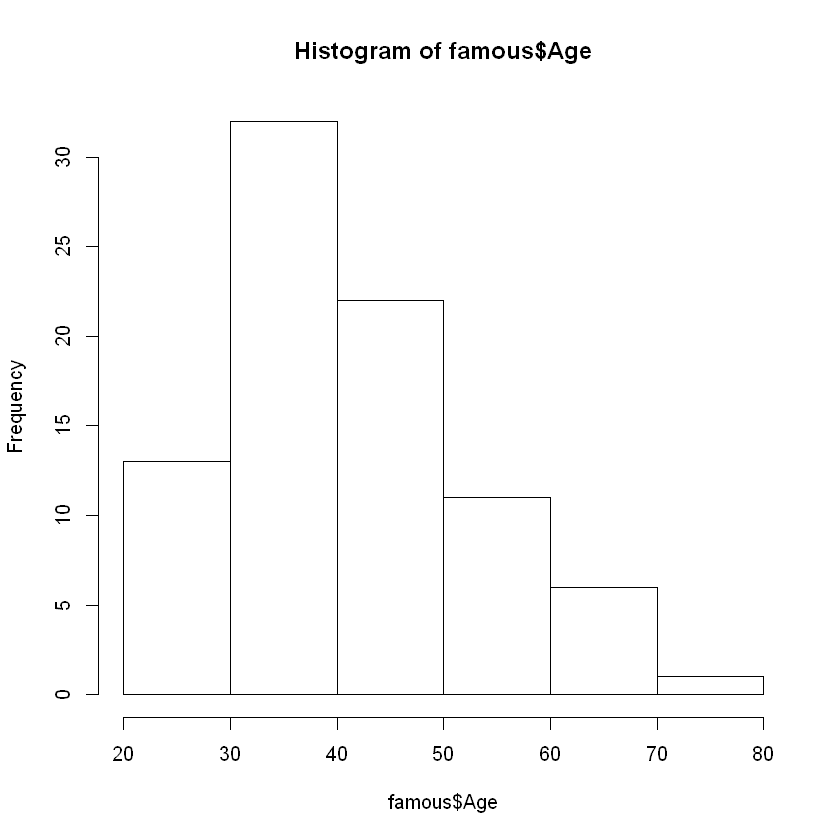

In [27]:
hist(famous$Age)

In [28]:
summary(famous$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.00   34.00   40.00   41.66   47.00   80.00 

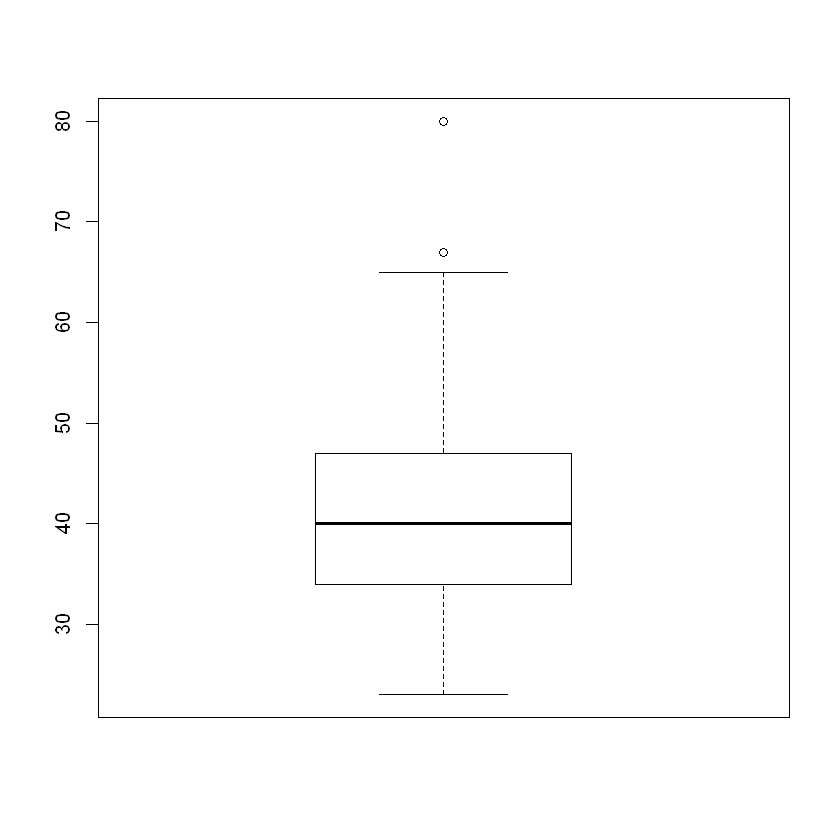

In [29]:
boxplot(famous$Age)

For each age group, fill in the proportion of artists who have 100,000 or more likes on Facebook.

In [30]:
twenties <-famous[famous$Age < 30,]
thirties <-famous[famous$Age > 29 & famous$Age < 40,]
forties <-famous[famous$Age > 39 & famous$Age < 50,]
fiftiesolder <-famous[famous$Age > 49,]

In [31]:
str(twenties)

'data.frame':	11 obs. of  14 variables:
 $ Artist       : Factor w/ 116 levels "Aimee Mann","Alabama Shakes",..: 2 35 38 41 43 46 66 68 72 74 ...
 $ Year         : int  2013 2009 2013 2012 2012 2013 2012 2012 2011 2011 ...
 $ Month        : Factor w/ 6 levels "December","February",..: 2 2 2 3 3 2 5 3 4 5 ...
 $ Season       : Factor w/ 2 levels "fall","winter": 2 2 2 2 2 2 1 2 1 1 ...
 $ Gender       : Factor w/ 2 levels "F","M": 1 1 1 2 1 2 1 1 1 2 ...
 $ Age          : int  24 29 28 27 26 29 23 27 29 26 ...
 $ Age.Group    : Factor w/ 4 levels "Fifties or Older",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Grammy       : Factor w/ 2 levels "N","Y": 1 2 2 1 1 1 2 1 2 2 ...
 $ Genre        : Factor w/ 4 levels "Country","Jazz/Blues",..: 3 2 2 3 3 3 3 4 1 3 ...
 $ BB.wk.top10  : int  1 1 1 1 1 1 0 0 1 0 ...
 $ Twitter      : int  73313 21245 51406 NA 657786 37651 129416 106202 2583357 360753 ...
 $ Twitter.100k : int  0 0 0 NA 1 0 1 1 1 1 ...
 $ Facebook     : int  298278 829939 236678 915459 4205054

In [32]:
str(thirties)

'data.frame':	31 obs. of  14 variables:
 $ Artist       : Factor w/ 116 levels "Aimee Mann","Alabama Shakes",..: 4 5 7 13 16 19 25 29 31 33 ...
 $ Year         : int  2009 2007 2010 2007 2012 2010 2005 2006 2008 2012 ...
 $ Month        : Factor w/ 6 levels "December","February",..: 5 4 3 1 5 4 1 2 3 5 ...
 $ Season       : Factor w/ 2 levels "fall","winter": 1 1 2 2 1 1 2 2 2 1 ...
 $ Gender       : Factor w/ 2 levels "F","M": 2 1 2 2 2 1 2 2 2 2 ...
 $ Age          : int  39 33 37 31 32 32 36 36 37 35 ...
 $ Age.Group    : Factor w/ 4 levels "Fifties or Older",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Grammy       : Factor w/ 2 levels "N","Y": 1 2 1 1 2 1 2 1 1 1 ...
 $ Genre        : Factor w/ 4 levels "Country","Jazz/Blues",..: 3 3 3 3 3 3 3 3 1 3 ...
 $ BB.wk.top10  : int  1 1 1 0 1 1 1 1 1 0 ...
 $ Twitter      : int  56343 404439 125758 114703 367417 20549 10666531 112030 668136 26928 ...
 $ Twitter.100k : int  0 1 1 1 1 0 1 1 1 0 ...
 $ Facebook     : int  318313 1711685 563505 1129035 16

In [33]:
str(forties)

'data.frame':	24 obs. of  14 variables:
 $ Artist       : Factor w/ 116 levels "Aimee Mann","Alabama Shakes",..: 9 11 14 18 20 21 23 27 34 45 ...
 $ Year         : int  2003 2007 2006 2008 2006 2006 2006 2009 2009 2009 ...
 $ Month        : Factor w/ 6 levels "December","February",..: 3 5 3 3 3 4 1 5 2 3 ...
 $ Season       : Factor w/ 2 levels "fall","winter": 2 1 2 2 2 1 2 1 2 2 ...
 $ Gender       : Factor w/ 2 levels "F","M": 2 1 2 2 2 2 1 2 2 2 ...
 $ Age          : int  43 47 46 40 45 47 41 46 49 44 ...
 $ Age.Group    : Factor w/ 4 levels "Fifties or Older",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Grammy       : Factor w/ 2 levels "N","Y": 2 1 2 2 2 1 1 2 1 2 ...
 $ Genre        : Factor w/ 4 levels "Country","Jazz/Blues",..: 3 4 3 1 3 3 4 3 1 3 ...
 $ BB.wk.top10  : int  1 1 1 1 NA 0 1 1 0 1 ...
 $ Twitter      : int  158647 450096 23244 1787221 962232 NA 46659 264123 24404 1270069 ...
 $ Twitter.100k : int  1 1 0 1 1 NA 0 1 0 1 ...
 $ Facebook     : int  1381051 2754505 164048 5429471 4

In [34]:
str(fiftiesolder)

'data.frame':	19 obs. of  14 variables:
 $ Artist       : Factor w/ 116 levels "Aimee Mann","Alabama Shakes",..: 1 17 24 26 28 32 37 42 59 60 ...
 $ Year         : int  2008 2012 2011 2008 2002 2007 2009 2011 2011 2010 ...
 $ Month        : Factor w/ 6 levels "December","February",..: 4 4 3 3 3 3 4 5 4 5 ...
 $ Season       : Factor w/ 2 levels "fall","winter": 1 1 2 2 2 2 1 1 1 1 ...
 $ Gender       : Factor w/ 2 levels "F","M": 1 1 2 2 2 1 2 2 1 2 ...
 $ Age          : int  52 63 60 55 61 56 58 51 63 65 ...
 $ Age.Group    : Factor w/ 4 levels "Fifties or Older",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Grammy       : Factor w/ 2 levels "N","Y": 2 2 1 1 2 2 2 1 1 2 ...
 $ Genre        : Factor w/ 4 levels "Country","Jazz/Blues",..: 4 1 3 3 3 1 3 3 1 2 ...
 $ BB.wk.top10  : int  0 1 0 0 0 1 0 1 0 0 ...
 $ Twitter      : int  101870 18683 40682 8981 NA 624380 47947 39893 46193 7114 ...
 $ Twitter.100k : int  1 0 0 0 NA 1 0 0 0 0 ...
 $ Facebook     : int  113576 357770 529395 135089 113310 706731

In [35]:
score <- c(nrow(twenties), nrow(thirties),nrow(forties),nrow(fiftiesolder))
score

[1] 11 31 24 19

In [36]:
sum(score)

[1] 85

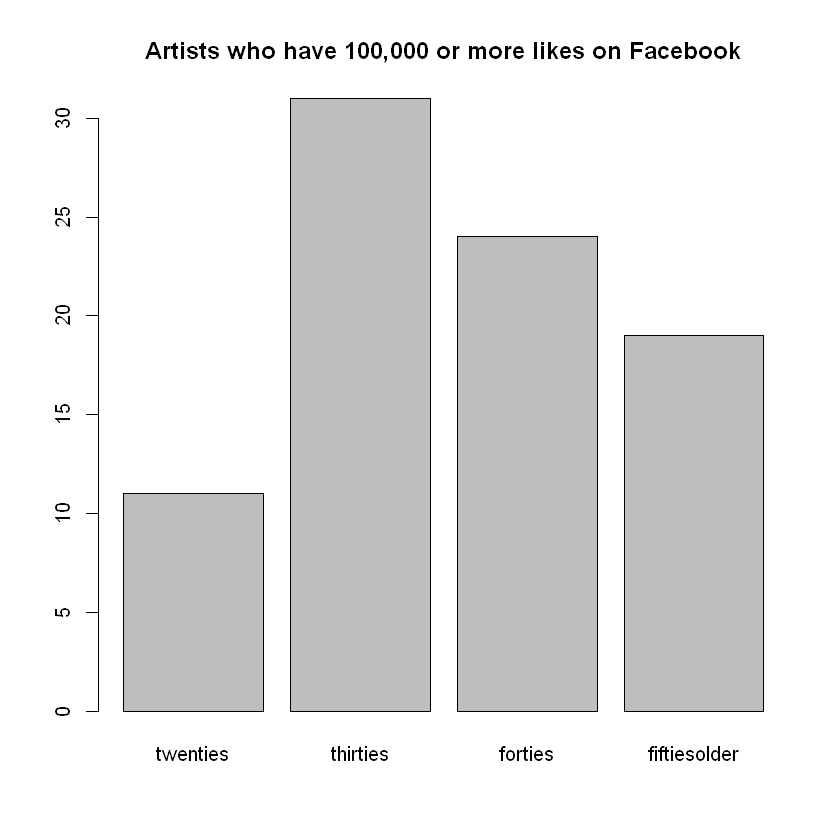

In [37]:
barplot(score, names.arg = c("twenties", "thirties", "forties", "fiftiesolder"), main = "Artists who have 100,000 or more likes on Facebook")